# The Art of Data Cleaning

Real world data is most often messy so the process of sorting it in a proper format before conducting a deeper analysis is called Data Cleaning. It involves several steps like identifying and handling missing values, duplicates, outliers etc. as given below. Let's go through each one by one. Happy learning!

# Missing Values Identification and Handling

Missing values often pose as 'NA', 'None', 'NaN', or zeros. Python's Pandas library simplifies the process of spotting them using the isnull() or isna() function (<i>isna() is just an alias for isnull()</i>). This function returns a DataFrame, replacing missing cells with True and non-missing cells with False.

## Identification and Counts

In [1]:
import pandas as pd

data = {'A':[2, 4, None, 8], 'B':[5, None, 7, 9], 'C':[12, 13, 14, None]}

df = pd.DataFrame(data)

# Identifying Missing Values
print(df.isnull())

       A      B      C
0  False  False  False
1  False   True  False
2   True  False  False
3  False  False   True


In [2]:
# counting missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)

A    1
B    1
C    1
dtype: int64


## Handling (fillna(), dropna())

After identification, missing values need to be dealt with. Python provides several strategies:

- fillna(): Fills the missing values.
- dropna(): Removes the missing values.


In [ ]:
# Fill missing values in whole df with 0
print(df.fillna(0)) 

     A    B     C
0  2.0  5.0  12.0
1  4.0  0.0  13.0
2  0.0  7.0  14.0
3  8.0  9.0   0.0
     A    B     C
0  2.0  5.0  12.0


In [4]:
# Handling Missing Values in One Column only
df["A"] = df["A"].fillna(0)
print(df)

     A    B     C
0  2.0  5.0  12.0
1  4.0  NaN  13.0
2  0.0  7.0  14.0
3  8.0  9.0   NaN


In [3]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'age': [25, np.nan, 35, np.nan, 45]
})

# Filling missing values with mean. # Luckily, df['age'].mean() doesn't consider missing values – hence, it works correctly without any workarounds.
mean_age = df['age'].mean()  # 35
df_new = df['age'].fillna(mean_age)
print(df_new)

0    25.0
1    35.0
2    35.0
3    35.0
4    45.0
Name: age, dtype: float64


In [ ]:
# Impute missing values using backward fill
df['age'].fillna(method='bfill', inplace=True)
print(df)

      name   age
0    Alice  25.0
1      Bob  35.0
2  Charlie  35.0
3    David  45.0
4      Eve  45.0


/var/folders/ll/1x3pcpw96cn3pc3l3hqztlvr0000gn/T/ipykernel_10494/1456571987.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(method='bfill', inplace=True)
/var/folders/ll/1x3pcpw96cn3pc3l3hqztlvr0000gn/T/ipykernel_10494/1456571987.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['age'].fillna(method='bfill', inplace=True)


In [ ]:
# Remove rows with missing values
print(df.dropna()) 

# Handling Redundant or Correlated Features

Machine learning models are grounded in mathematics, and we need to ensure that the input data doesn't contain multicollinearity, meaning predictors are not dependent on each other thus violating the assumption of independence among predictors and impacting the predictive model's performance. If two features are highly correlated, they carry similar information.

To quantify this relationship, we use the correlation coefficient, a value between -1 and 1. If the correlation coefficient is close to 1, it indicates a strong positive correlation. Conversely, a coefficient near -1 indicates a strong negative correlation. A coefficient close to zero suggests no correlation.

In [ ]:
import seaborn as sns

# Load the dataset
titanic_df = sns.load_dataset('titanic')

# Calculate and print the correlation matrix
corr_matrix = titanic_df.corr(numeric_only=True)
print(corr_matrix)

            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


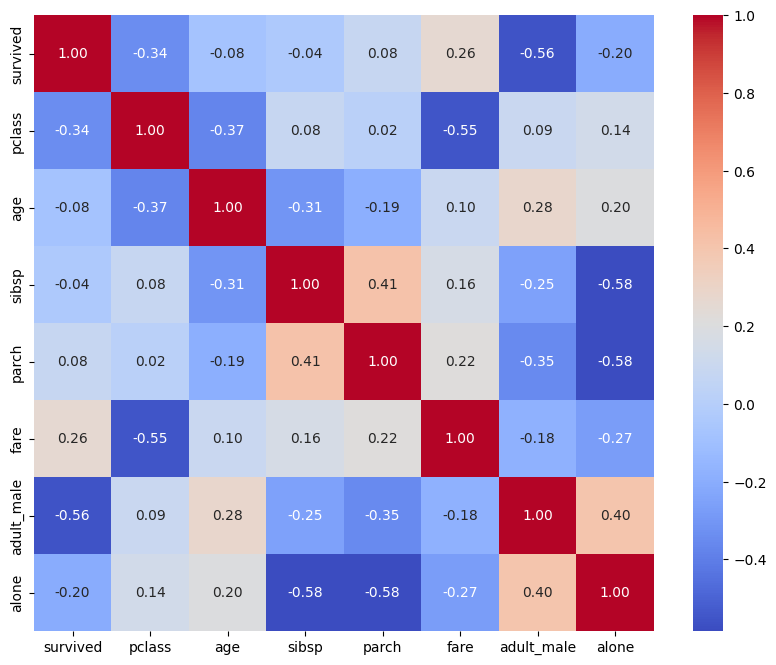

In [ ]:
# Create a heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
# Show the plot

plt.show()

In [4]:
# If 'fare' and 'pclass' are highly correlated
clean_df = titanic_df.drop('fare', axis=1)

# Duplicates and Outliers observations

Clean dataset is a prerequisite for accurate data analysis. Two issues that are frequently encountered while cleaning data are duplicates and outliers.

### Handling Duplicates

In [1]:
import pandas as pd

# Create DataFrame
data = {'Name': ['John', 'Anna', 'Peter', 'John', 'Anna'],
        'Age': [16, 15, 13, 16, 15],
        'Grade': [9, 10, 7, 9, 10]}
df = pd.DataFrame(data)

# identify duplicates
print(df.duplicated())

# delete duplicates
df = df.drop_duplicates()
print(df)

0    False
1    False
2    False
3     True
4     True
dtype: bool
    Name  Age  Grade
0   John   16      9
1   Anna   15     10
2  Peter   13      7


### Handling Outliers

Outliers are anomalous or unusual values that significantly deviate from other observations. They can adversely impact the performance of our machine-learning models by introducing bias or skewness. 

Outliers can be detected visually using tools like box plots, scatter plots, or statistical methods such as Z-score or IQR. Given a set of values, the Z-score of a value is the distance between that value and the dataset's mean, expressed in terms of the standard deviation.

#### Using Z-score

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Load the dataset
titanic_df = sns.load_dataset('titanic')

# Calculate Z-scores
titanic_df['age_zscore'] = np.abs((titanic_df["age"] - titanic_df["age"].mean()) / titanic_df["age"].std())

# Get rows of outliers according to the Z-score method (using a threshold of 3)
outliers_zscore = titanic_df[(titanic_df['age_zscore'] > 3)]
print(outliers_zscore)

     survived  pclass   sex   age  sibsp  parch    fare embarked  class  who  \
630         1       1  male  80.0      0      0  30.000        S  First  man   
851         0       3  male  74.0      0      0   7.775        S  Third  man   

     adult_male deck  embark_town alive  alone  age_zscore  
630        True    A  Southampton   yes   True    3.462699  
851        True  NaN  Southampton    no   True    3.049660  


#### Using IQR

In [7]:
import pandas as pd

# Create dataset
data = pd.DataFrame({
    'students': ['Alice', 'Bob', 'John', 'Ann', 'Rob'],
    'scores': [56, 11, 50, 98, 47]
})
df = pd.DataFrame(data)

# identifying duplicates using IQR
Q1 = df['scores'].quantile(0.25)  # 47.0
Q3 = df['scores'].quantile(0.75)  # 56.0
IQR = Q3 - Q1  # 9.0

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['scores'] < lower_bound) | (df['scores'] > upper_bound)]
print(outliers)

  students  scores
1      Bob      11
3      Ann      98


There are two common strategies for dealing with outliers: remove them or replace them with a median value (using np.where).

In [8]:
import numpy as np

print(df)

# outlier removal
df_without_outliers = df[(df['scores'] >= lower_bound) & (df['scores'] <= upper_bound)]
print(df_without_outliers)

# outlier replacement
median = df['scores'].median()
df['scores'] = np.where((df['scores'] > upper_bound) | (df['scores'] < lower_bound), median, df['scores'])
print(df)

  students  scores
0    Alice      56
1      Bob      11
2     John      50
3      Ann      98
4      Rob      47
  students  scores
0    Alice      56
2     John      50
4      Rob      47
  students  scores
0    Alice    56.0
1      Bob    50.0
2     John    50.0
3      Ann    50.0
4      Rob    47.0


## Data Normalization/Scaling Techniques (Standard, MinMax, Robust)
If data sets are in various scales or units, certain data elements may unfairly dominate the analysis. Data normalization is a process that brings your data into a common format, allowing for fair and unbiased comparisons. 

Let's briefly discuss three popular techniques to standardize numerical data.

* Standard Scaler: It assumes data is normally distributed and scales it to have zero mean and unit variance. It's best used when the data is normally distributed. In other words, when the values of a particular feature follow a bell curve, a Standard Scaler is a good option to standardize the feature. Its formula is: 

$$ z = \frac{x - \mu}{\sigma} $$

In this expression, μ is the mean value, and σ is the standard deviation.

* Min-Max Scaler: Also known as normalization, this technique scales data to range between 0 and 1 (or -1 to 1 if there are negative values). It's commonly used for algorithms that don't assume any distribution of the data. This means if your data doesn't follow a specific shape or form, you might consider using Min-Max Scaler. The mathematical expression is: 

$$ x_{\text{new}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}} $$

This is a linear transformation which changes the scale but not the shape of the distribution.

* Robust Scaler: As its name suggests, this scaler is robust to outliers. It uses the Interquartile Range (IQR) to scale data, and it's suitable when the dataset contains outliers. Outliers are data points that significantly deviate from other observations. They can be problematic because they can affect the results of a data analysis.

There's no "one size fits all" scaler so choose scaling technique according to your data needs.



#### Manual MinMax and Zscore Scaling

In [1]:
import pandas as pd
df = pd.DataFrame({
    "Space Explorer": ['Spock', 'Kirk', 'McCoy', 'Scotty'],
    "Height": [183, 178, 170, 178]
})

df['Height_minmax'] = (df['Height'] - df['Height'].min()) / (df['Height'].max() - df['Height'].min())
print(df['Height_minmax'])
# After normalization, df['Height'] is [1, 0.61, 0, 0.61]

df['Height_zscore'] = (df['Height'] - df['Height'].mean()) / df['Height'].std()
print(df['Height_zscore'])
# After normalization, df['Height'] is [1.07, 0.14, -1.35, 0.14]

0    1.000000
1    0.615385
2    0.000000
3    0.615385
Name: Height_minmax, dtype: float64
0    1.069286
1    0.139472
2   -1.348230
3    0.139472
Name: Height_zscore, dtype: float64


#### sklearn StandardScalar(), MinMaxScaler(), RobustScaler()

In [5]:
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset and drop rows with missing values
titanic_df = sns.load_dataset('titanic').dropna()

# Initialize the StandardScaler
std_scaler = StandardScaler()

# Fit and transform the 'age' column
titanic_df['age'] = std_scaler.fit_transform(np.array(titanic_df['age']).reshape(-1, 1))

# Check the transformed 'age' column
print(titanic_df['age'].head())

1     0.152082
3    -0.039875
6     1.175852
10   -2.023430
11    1.431795
Name: age, dtype: float64


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform the 'fare' column
titanic_df['fare'] = min_max_scaler.fit_transform(np.array(titanic_df['fare']).reshape(-1, 1))

# Check the transformed 'fare' column
print(titanic_df['fare'].head())

1     0.139136
3     0.103644
6     0.101229
10    0.032596
11    0.051822
Name: fare, dtype: float64


In [ ]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the 'fare' column
titanic_df['fare'] = robust_scaler.fit_transform(np.array(titanic_df['fare']).reshape(-1, 1))

# Check the transformed 'fare' column
# The fare values now reflect how many IQRs are away from the median. This scaling method is resilient to outliers, which effectively become small positive and negative values.
print(titanic_df['fare'].head())

1     0.236871
3    -0.064677
6    -0.085199
10   -0.668325
11   -0.504975
Name: fare, dtype: float64


### Choosing the Right Scaling Method

Choosing the right normalization technique can be pivotal in obtaining accurate data analysis results. The right method primarily depends on the nature of your data and the specific requirements of your analyses.

Use Min-Max Normalization when:
- Your data is bounded and falls within a specific range.
- The distribution is not normal, or the standard deviation is very small.
- You're working with algorithms that require data to be on the same scale, like Neural Networks, or k-Nearest Neighbors.

Example: Let's take an audio signal that has a minimum and maximum volume. Based on the concept of audio normalization, we want to rescale the signal to fit into a desired range, we would use Min-Max scaling here.

Use Z-Score Normalization when:
- The data is influenced by outliers as Z-Score is less sensitive to them.
- The data is not uniformly distributed and you want to handle skewness.
- You're dealing with techniques that assume data as centered, like Principal Component Analysis.

Example: Suppose we have a dataset of student's scores which might contain extreme values (like a score of 100 or 0). To reduce this, we can use Z-Score normalization to identify and handle these score outliers.

In [2]:
import pandas as pd

planets = pd.DataFrame({
"Planet": ['Mercury', 'Jupiter', 'Saturn', 'Mars'],
"Orbit Speed": [47.87, 13.07, 9.69, 24.07]
})

# Use Min-Max normalization
sp = planets['Orbit Speed']
planets['Orbit Speed'] = (sp - sp.min()) / (sp.max() - sp.min())
print(planets)

    Planet  Orbit Speed
0  Mercury     1.000000
1  Jupiter     0.088528
2   Saturn     0.000000
3     Mars     0.376637


## Categorical Data Encoding Techniques

Categorical Data consist of groups or traits such as "gender", "marital status", or "hometown". We convert categories into numbers using Label and One-Hot Encoding techniques.

### One-Hot Encoding (pd.get_dummies())
It creates additional columns for each category, placing a 1 for the appropriate category and 0s elsewhere. It's preferred for nominal data, where order doesn't matter, such as "Red", "Green", "Blue".

### Why One-Hot Encoding?
As One-Hot encoding converts each category value into a new column and assigns a 1 or 0 (True/False) value to the column, it does not impose any ordinal relationship among categories where there is none. This can often be the case with labels like 'Red', 'Blue', 'Green'. 

In [2]:
df = pd.DataFrame({
    'item_id': [1302, 1440, 1220, 2038, 1102],
    'colors': ['Red', 'Green', 'Blue', 'Red', 'Green']
})

df = pd.get_dummies(df, columns=['colors'], prefix='color')  # One-hot encode specified column
print(df)

   item_id  color_Blue  color_Green  color_Red
0     1302       False        False       True
1     1440       False         True      False
2     1220        True        False      False
3     2038       False        False       True
4     1102       False         True      False


### Label Encoding (pd.factorize())
It maps categories to numbers ranging from 0 through N-1, where N represents the unique category count. It's beneficial for ordered data like "Small", "Medium", and "Large".


In [1]:
import pandas as pd
import seaborn as sns

# Load Titanic dataset
titanic_df = sns.load_dataset('titanic')

# Label Encoding for 'sex'
titanic_df['sex_encoded'] = pd.factorize(titanic_df['sex'])[0]
print(titanic_df[['sex', 'sex_encoded']].head())

      sex  sex_encoded
0    male            0
1  female            1
2  female            1
3  female            1
4    male            0


#### Manual label encoding

In [ ]:
import pandas as pd

sizes = ["Small", "Medium", "Large"]

df = pd.DataFrame({
    'item_id': [1302, 1440, 1220, 2038, 1102],
    'sizes': ['Small', 'Medium', 'Large', 'Small', 'Medium']
})

# Label Encoding
size_mapping = {"Small": 0, "Medium": 1, "Large": 2}
df['sizes'] = df['sizes'].map(size_mapping)  # Apply mapping to the specified column
print(df)

   item_id  sizes
0     1302      0
1     1440      1
2     1220      2
3     2038      0
4     1102      1


### Categorical Data Encoding Pitfalls and Best Practices
- Label Encoding can create an unintended order, which may mislead our model. 
- One-Hot Encoding can slow down our model when used with many unique categories. 
- Consider merging select categories or using different encoding techniques to combat these issues. For instance, the 'Species' feature in an 'Animal Shelter' dataset can be restructured to address such problems. Instead of Label Encoding or One-Hot Encoding each unique species like 'Dog', 'Cat', 'Rabbit', and 'Bird', we can merge 'Dog' and 'Cat' into a new category 'Pet', and 'Rabbit' and 'Bird' into 'Other'. This technique reduces our feature's unique categories, making it more model-friendly.

# Feature Selection

Benefits:

1. It simplifies the models, thus making them easier to interpret. 

2. It also enhances accuracy if the right subset is chosen by eliminating irrelevant or partially relevant features that could negatively impact model performance. 

3. Feature selection tackles a daunting problem known as the curse of dimensionality, thus preventing model overfitting and boosting the model's speed.

Feature selection techniques can be broadly classified into three categories:

1. Filter Methods: These methods are **commonly used as preprocessing steps**. They employ statistical measures to assign a score to each feature, which is then used to filter out features with low scores. Examples include the Chi-square test, the Fisher Score, and the Correlation Coefficient.
    - e.g. using correlation analysis to pick predictors that have high correlation with target variable

2. Wrapper Methods: Wrapper methods treat selecting a set of features as a search problem, where combinations are prepared of different features and checked against the problem. Examples include Recursive Feature Elimination, Forward Selection, and Backward Selection.

3. Embedded Methods: Embedded methods are a catch-all group of techniques that perform feature selection as part of the model construction process. They are usually more computationally efficient than the wrapper methods, providing an excellent trade-off between Filter and Wrapper methods by weaving their functionalities into creating a machine-learning model. Examples are LASSO and RIDGE regression, which have inbuilt penalization functions to reduce overfitting.



# Feature Engineering for better predictions

In [5]:
# Load the data
import seaborn as sns

titanic_df = sns.load_dataset('titanic')

# Create a new feature, 'family_size'
titanic_df['family_size'] = titanic_df['sibsp'] + titanic_df['parch'] + 1
print(titanic_df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  family_size  
0    man        True  NaN  Southampton    no  False            2  
1  woman       False    C    Cherbourg   yes  False            2  
2  woman       False  NaN  Southampton   yes   True            1  
3  woman       False    C  Southampton   yes  False            2  
4    man        True  NaN  Southampton    no   True            1  


## Data Binning Techniques

Imagine a shopkeeper sorting different types of fruit into separate baskets. That’s much like what binning is. In data preprocessing, binning converts continuous values into categorical bins or groups, thus simplifying data analysis.

### Importance of Data Binning
Datasets with numerous variables can lead to complex relationships that may distort analysis results. Binning groups similar data together, simplifying the dataset and reducing the impact of individual observation errors.

We can implement Panda's cut() and qcut() methods for binning data.


In [6]:
import pandas as pd

df = pd.DataFrame({'ages': [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]})

bins = [17, 25, 35, 60, 100]
labels = ["Youth", "YoungAdult", "MiddleAged", "Senior"]
# it's noteworthy that the bins we create are right-closed intervals e.g. Youth = (17, 25] and YoungAdult = (25, 35] ...
df['categories'] = pd.cut(df['ages'], bins, labels=labels)

for category in set(df['categories']):
    print(f"{category}: {list(df[df['categories'] == category]['ages'])}")

Youth: [20, 22, 25, 21, 23]
Senior: [61]
YoungAdult: [27, 31, 32]
MiddleAged: [37, 45, 41]


In [7]:
df['categories'].value_counts()

categories
Youth         5
YoungAdult    3
MiddleAged    3
Senior        1
Name: count, dtype: int64

In [ ]:
# with qcut() bins' boundaries are automatically adjusted so that all the bins contain the same number of values 
df['categories'] = pd.qcut(df['ages'], q=4)
print(df)

labels = ["Q1", "Q2", "Q3", "Q4"]
df['quartile_categories'] = pd.qcut(df['ages'], q=4, labels=labels)

# providing labels to bins makes the quartiles easier to understand and interpret.
for category in sorted(set(df['quartile_categories'])):
    print(f"{category}: {list(df[df['quartile_categories'] == category]['ages'])}")

    ages       categories
0     20  (19.999, 22.75]
1     22  (19.999, 22.75]
2     25    (22.75, 29.0]
3     27    (22.75, 29.0]
4     21  (19.999, 22.75]
5     23    (22.75, 29.0]
6     37     (29.0, 38.0]
7     31     (29.0, 38.0]
8     61     (38.0, 61.0]
9     45     (38.0, 61.0]
10    41     (38.0, 61.0]
11    32     (29.0, 38.0]
Q1: [20, 22, 21]
Q2: [25, 27, 23]
Q3: [37, 31, 32]
Q4: [61, 45, 41]


In [ ]:
df = pd.DataFrame({'StudentAge': [10, 12, 14, 9, 15, 19, 17, 12, 10, 14]})
bins = [0, 9, 12, 15, 19]
labels = ["grade1", "grade2", "grade3", "grade4"]
df['GradeLevel'] = pd.cut(df['StudentAge'], bins, labels=labels)
print(df)


students = pd.DataFrame({'age': [6, 8, 10, 12, 14, 16, 18, 20, 22, 24]})
groups = ["primary", "middle", "high", "college"]
students['school_level'] = pd.qcut(students['age'], q=4, labels=groups)

# Random Quote

"Errors are merely opportunities to learn."

So in other words, make more errors because that is how you learn.